# Creating surface density images from TIGRESS simulation data

# packages to be used
 * matplotlib http://matplotlib.org/
 * numpy http://www.numpy.org/
 * pandas http://pandas.pydata.org/
 * astropy http://www.astropy.org/

First need to import standard python packages: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
sys.path.pop(1)
sys.path.insert(0,'../')
from matplotlib.colors import LogNorm
import cPickle as pickle

 You can check the version number of a package:

In [2]:
import matplotlib
matplotlib.__version__

'2.2.2'

### To read and extract information from TIGRESS data we use modules from the pyathena package

In [3]:
import pyathena as pa
pa.__file__

'../pyathena/__init__.pyc'

## Unit system

The unit system for the TIGRESS simulations is
* [length] = pc
* [velocity] = km/s
* [density] = 1.4271*m_H/cm^3

In [4]:
#We use set_units from pyathena for units conversions
# This uses units and constants from astropy
from pyathena import set_units
set_units

<function pyathena.set_units.set_units>

In [5]:
unit=set_units(muH=1.4271)
print unit['density'].cgs/1.4271/c.m_p.cgs
print unit['velocity']
print unit['length']
print unit['mass']
print unit['time']
print unit['magnetic_field']

1.0 1 / cm3
1.0 km / s
1.0 pc
0.0352682242985 solMass
0.977792221673 Myr
0.547685223955 uG


In [6]:
# other units can be easily obtained
print unit.keys()

['number_density', 'temperature', 'density', 'magnetic_field', 'pressure', 'length', 'mass', 'time', 'velocity', 'muH', 'gravitational_potential']


In [7]:
#We'll use these later
codemass=unit['mass']
codetime=unit['time']
codelength=unit['length']
codevel=unit['velocity']
print codemass,codetime,codelength,codevel

0.0352682242985 solMass 0.977792221673 Myr 1.0 pc 1.0 km / s


## Density projection

The density projection, also known as the surface density, is the integral of density along the z direction:
$\Sigma =\int \rho dz$

Density projections from the TIGRESS simulations have been calculated and stored to "pickle" files. 

The following document provides information about pickle. 
https://docs.python.org/3/library/pickle.html

We use the "cPickle" library, which is implemented in C and is much faster.

## Simulation pickle file directory must be set up 

#### You may be using either simulations that have already been run (1), or new simulations (2)

### (1) Data Location for TIGRESS solar nbhd. simulations that have already been run:

* "4pc" model output can be found in directories "/tigress/changgoo/MHD_4pc/", "/tigress/changgoo/MHD_4pc_T2/", and "/tigress/changgoo/MHD_4pc_new/"

* "2pc" model (based on restart of 4pc model) output can be found in "/tigress/changgoo/MHD_2pc_new/" and "/tigress/changgoo/MHD_2pc_S/"

* There are also "8pc" and "16pc" lower-resolution data in "/tigress/changgoo/"

####  For description of the various Solar neighborhood simulations (box size, feedback type, restart time, etc.) see:
https://github.com/PrincetonUniversity/Athena-TIGRESS/wiki/Solar-Neighborhood

### (2) Data Location for new simulations:

* In general, the output files and directories for new simulations will be the same as for previous simulations, with full vtk outputs in /id0, /id1 etc, history files in /id0, surface density vtk outputs in /surf, star particle vtk files in /starpar.


* Surface density data files in pickle format have an extension ".surf.p"
* Star particle data files have an extension "starpar.vtk"

In [8]:
#this line choses a particular file from TIGRESS simulations that have already been run:
surf_file='/tigress/changgoo/MHD_2pc_S/surf/MHD_2pc_S.0400.surf.p'
# If the path is already set up, you could also use something like this:
#surf_file='MHD_2pc_S.0420.surf.p'

In [9]:
#this line reads in the binary file to 'surf' using pickle
surf=pickle.load(open(surf_file,'rb'))
surf.keys()

['data', 'bounds']

In [10]:
# "surf" is a dictionary, containing XY domain boundaries in 'bounds' and the surface density 
# in 'data' , both as a numpy arrays.
print surf['bounds']
# to get data dimensions,
print surf['data'].shape

[-512.  512. -512.  512.]
(512, 512)


In [11]:
# The grid physical dimensions (in code units of parsecs) are given by:
Lx=surf['bounds'][1]-surf['bounds'][0]
Ly=surf['bounds'][3]-surf['bounds'][2]
#The resolution (number of zones in x and y directions) is given by:
Nx,Ny=surf['data'].shape

# The size of each zone (in pc):
dx=Lx/Nx
dy=Ly/Ny
#This should match the model name:
dx

2.0

9.088362065060341
0.17613959150125988 382.6716370547481
35.81039864770716


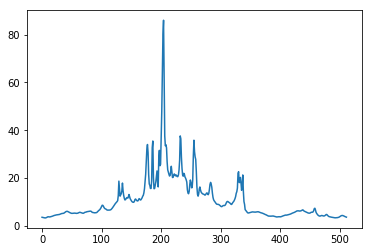

In [12]:
# The surface density data in the pickle file has already been converted to units of M_sun/pc^2 
# This is the mean value of the array:
print surf['data'].mean()
# These are the minimum and maximum values:
print np.amin(surf['data']),np.amax(surf['data'])
# This is the value at the center of the array:
print surf['data'][255,255]
# You can make a cut through the array:
cut=surf['data'][:,255]
cut[255]
plt.plot(cut)

Text(0.5,0,'log($\\Sigma$)')

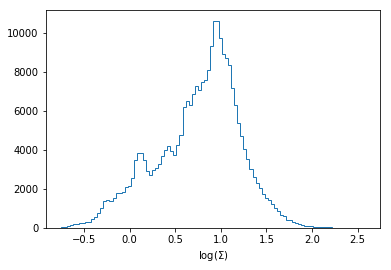

In [13]:
#This is the overall distribution of surface density
hist=plt.hist(np.log10(surf['data']).flatten(),bins=100,histtype='step')
plt.xlabel(r'log($\Sigma$)')

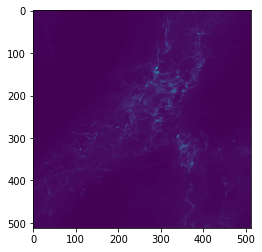

In [14]:
# Make a basic image of the surface density
plt.imshow(surf['data'])

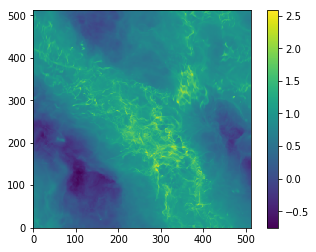

In [15]:
# Since there is a large range of values (based on min and max) it's better to use log scale
# for the image
# There are two ways to do this.
# (1) You can take log10 of the data directly, and make the image
#  We also explicitly put the origin in the lower-left corner, since default upper
im=plt.imshow(np.log10(surf['data']),origin='lower')
# Add a colorbar:
plt.colorbar(im)

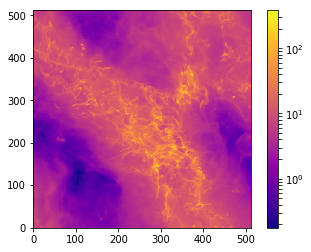

In [16]:
# (2) Alternatively, you can change the colorbar to log scale.
# We usually prefer this method.
# You can also choose the colormap to use.  
# For choics see: https://matplotlib.org/examples/color/colormaps_reference.html
im=plt.imshow(surf['data'],norm=LogNorm(),cmap='plasma',origin='lower')
plt.colorbar(im)

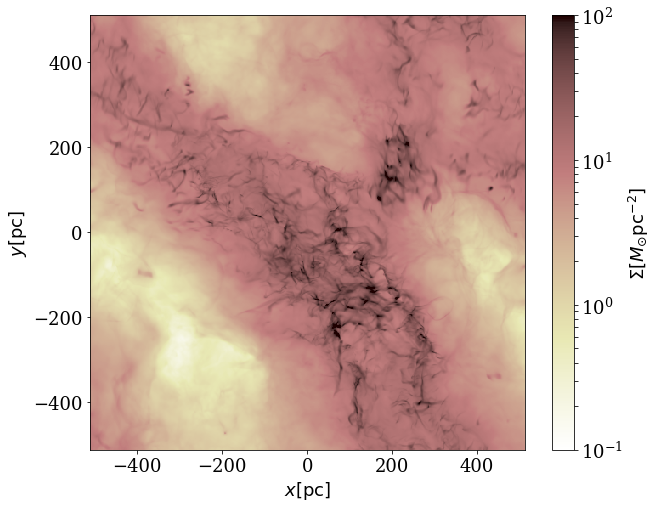

In [17]:
# This example shows how to make axes based on 'bounds' imported from the pickle file, 
#  choose the range shown in the color map, and make labels for axes and the color bar

plt.rcParams['font.size']=18
plt.rcParams['font.family']='serif'
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
im=ax.imshow(surf['data'],norm=LogNorm(),origin='lower')
im.set_clim(1.e-1,1.e2)
im.set_extent(surf['bounds'])
im.set_cmap('pink_r')
#note that the raw LaTeX string is designated by r'$string$'
ax.set_xlabel(r'$x [{\rm pc}]$')
ax.set_ylabel(r'$y [{\rm pc}]$')
cbar=plt.colorbar(im)
cbar.set_label(r'$\Sigma [M_{\odot} {\rm pc}^{-2}]$')

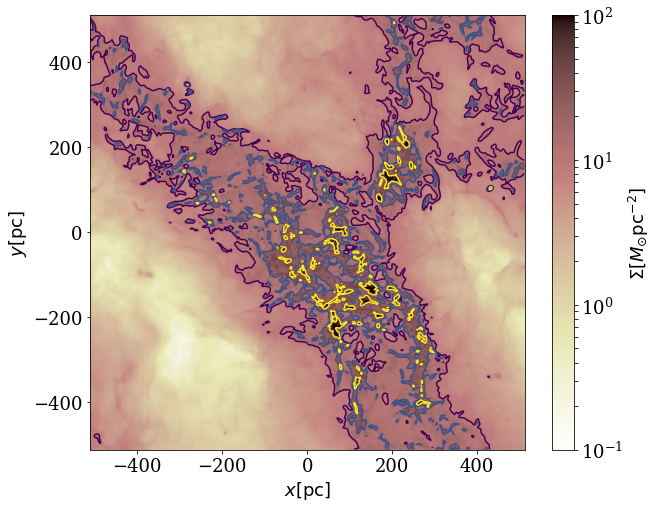

In [18]:
# This sets up cell-centered coordinates using 'bounds'
x=np.arange(surf['bounds'][0],surf['bounds'][1],dx)+0.5*dx
y=np.arange(surf['bounds'][2],surf['bounds'][3],dy)+0.5*dy
X, Y = np.meshgrid(x,y)

# You can use this to overplot contours on top of the Surface density map at Sigma=10, 20, 50
ct=ax.contour(X,Y,surf['data'],[10,20,50])
fig

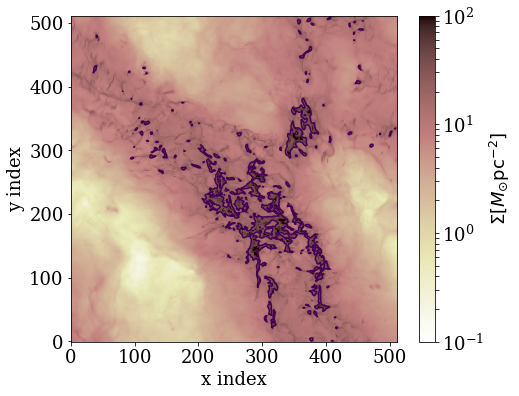

In [19]:
#Images and contouring can also be done using different commands.
#
#Here the image uses the array indices (0 to 511) rather than physical bounds (-512 to 512)
plt.figure(figsize=(8,6))
plt.imshow(surf['data'],origin='lower',norm=LogNorm(),cmap='pink_r',clim=(0.1,1.e2))
plt.xlabel('x index')
plt.ylabel('y index')
cbar=plt.colorbar()
cbar.set_label(r'$\Sigma [M_{\odot} {\rm pc}^{-2}]$')
plt.contour(surf['data'],levels=[30])

## Handling Star Particle Data

In [20]:
# TIGRESS simulations include star particles, representing star clusters and runaway OB stars
# The star particle information is stored in the *.starpar.vtk files

# Note that you must be sure to read the star particle file from the SAME time snapshot as the 
# gas surface density file

# This line choses a particular file from TIGRESS simulations that have already been run:
sp_file='/tigress/changgoo/MHD_2pc_S/starpar/MHD_2pc_S.0400.starpar.vtk'
# This line reads the star particle data in
sp=pa.read_starvtk(sp_file)

In [21]:
# Star particle data include age, id, mass, time, velocity (3 components), position (3 components),
# All star particle data are in code units, so conversion to desired units may be needed
sp.keys()

Index([u'age', u'id', u'mass', u'time', u'v1', u'v2', u'v3', u'x1', u'x2',
       u'x3'],
      dtype='object')

In [22]:
#Note that read_starvtk returns particle information as a pandas data frame; you can select
# the items you would like to view or manipulate.
# For example:
sp[['age','mass','x1','x2','x3']][4:10]

,age,mass,x1,x2,x3
4,-18.811256,0.000000,502.268127,385.791718,256.314667
5,-9.917297,0.000000,158.078171,28.742859,273.960815
6,-8.023419,0.000000,-108.679764,-342.343567,240.079651
7,-4.805349,0.000000,-80.473206,-312.149628,244.998108
8,285.519836,110245.140625,480.660675,-245.836090,164.391052
9,-5.252263,0.000000,121.996658,-220.186020,232.654892


In [23]:
# The time for all star particles is the time for the snapshot
print(sp['time'][0:10])

0    399.0001
1    399.0001
2    399.0001
3    399.0001
4    399.0001
5    399.0001
6    399.0001
7    399.0001
8    399.0001
9    399.0001
Name: time, dtype: float64


In [24]:
#these are some of the attributes for star particle #20, in physical units:
print sp['mass'][20]*codemass, sp['age'][20]*codetime,sp['x1'][20]*codelength,sp['x3'][20]*codelength,sp['v3'][20]*codevel


5649.17654864 solMass 207.872470367 Myr 160.524017334 pc 114.308242798 pc 8.37259483337 km / s


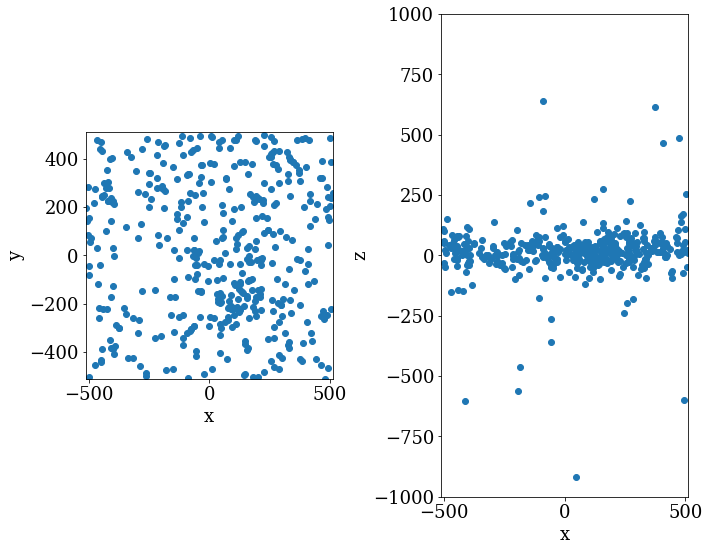

In [25]:
# Let's plot star particles
plt.figure(figsize=(10,8))
#First, project positions onto the horizontal plane (x,y):
hor=plt.subplot(121,aspect='equal')
hor=plt.plot(sp['x1'],sp['x2'],'o')
plt.axis(surf['bounds'])
plt.xlabel('x')
plt.ylabel('y')
#Second, project positions onto the radial-vertical plane (x,z):
ver=plt.subplot(122,aspect='equal')
ver=plt.plot(sp['x1'],sp['x3'],'o')
plt.axis([surf['bounds'][0],surf['bounds'][1],-1000,1000])
plt.xlabel('x')
plt.ylabel('z')
plt.tight_layout()

In [26]:
# We would like to distinguish between active (young) star particles and inactive star 
# particles, and between cluster and runaway star particles 
# For age, we need the code unit of time in Myr
tunit_Myr=unit['time'].to('Myr').value
print tunit_Myr
#this is the same as:
print codetime.value
# First select young star particles (age < 40Myr)
# "young" is a boolean array: True for young, False for old
young=sp['age'] * tunit_Myr < 40.

print len(sp['age']),len(young)

#This is the number of young star particles:
print young.sum()

# Second, separate clusters (mass != 0) and runaways (mass == 0)
# (mass of runaway OB stars was set to zero in the code)
# "runaway" and "cluster" are also boolean arrays
runaway=sp['mass'] == 0
cluster=sp['mass'] != 0

print runaway.sum(),cluster.sum(),runaway.sum()+cluster.sum()
# young * cluster is True for young and cluster particles
young_cluster = young & cluster
young_runaway = young & runaway

print young_cluster.sum()
# Note that all runaways are young
print young_runaway.sum()

0.977792221673
0.977792221673
432 432
120
71 361 432
49
71


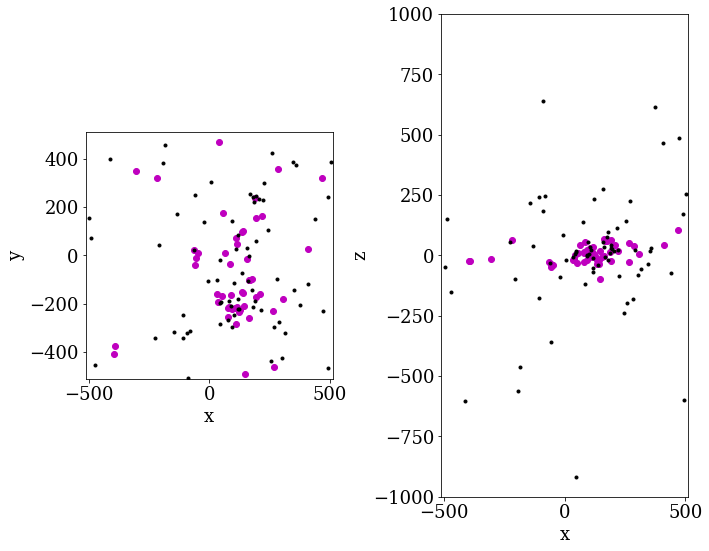

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(121,aspect='equal')
plt.plot(sp['x1'][young_cluster],sp['x2'][young_cluster],'mo')
plt.plot(sp['x1'][runaway],sp['x2'][runaway],'k.')
plt.axis(surf['bounds'])
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(122,aspect='equal')
plt.plot(sp['x1'][young_cluster],sp['x3'][young_cluster],'mo')
plt.plot(sp['x1'][runaway],sp['x3'][runaway],'k.')
plt.axis([surf['bounds'][0],surf['bounds'][1], -1000,1000])
plt.xlabel('x')
plt.ylabel('z')
plt.tight_layout()

<function matplotlib.pyplot.imshow>

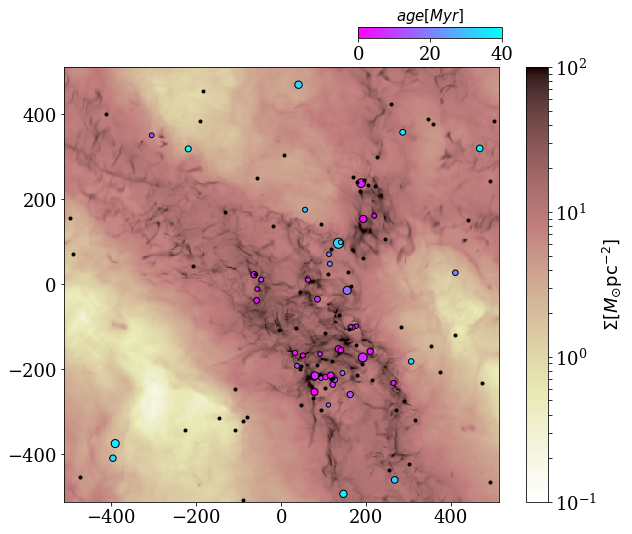

In [29]:
# We can visualize additional information about the star particle attributes. 
# For example, we can set the symbol size of cluster particles based on mass and color based on age.
# We start by converting mass and age in Msun and Myr, respectively.
munit_Msun=unit['mass'].to('Msun').value
# We wish to only select and view the active clusters
mass=sp['mass'][young_cluster]*munit_Msun
age=sp['age'][young_cluster]*tunit_Myr

fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,aspect='equal')
#First plot surface density
ax.axis(surf['bounds'])
im=ax.imshow(surf['data'],norm=LogNorm(),origin='lower')
im.set_clim(1.e-1,1.e2)
im.set_extent(surf['bounds'])
im.set_cmap('pink_r')
cbar=plt.colorbar(im)
cbar.set_label(r'$\Sigma [M_{\odot} {\rm pc}^{-2}]$')
#Next plot the cluster particles
sc=ax.scatter(sp['x1'][young_cluster],sp['x2'][young_cluster],marker='o',edgecolor='black', linewidth=1,s=mass/50.,c=age,
           vmax=40,vmin=0,cmap=plt.cm.cool_r)
#Add the runaways
plt.plot(sp['x1'][runaway],sp['x2'][runaway],'.k')
# Now adding the colorbar for cluster particles
cax1 = fig.add_axes([0.55, 0.93, 0.2, 0.02])
cbar=plt.colorbar(sc,ticks=[0,20,40],cax=cax1,orientation='horizontal')
cbar.ax.set_title(r'$age [Myr]$',size='small')
plt.imshow
# overplot a contour at Surface density =10
#ct=ax.contour(X,Y,surf['data'],[10],colors=('green'))
